In [35]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib

In [4]:
amazon = pd.read_csv("amazon_dataset.csv")

In [5]:
print(amazon.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [6]:
amazon["user_id"] = amazon["user_id"].astype(str)

In [7]:
amazon["discounted_price"] = amazon["discounted_price"].str.replace("₹"," ").str.replace(",","").astype(float)

In [8]:
amazon["actual_price"] = amazon["actual_price"].str.replace("₹","").str.replace(",","").astype(float)

In [9]:
amazon["discount_percentage"] = amazon["discount_percentage"].str.replace("%","").astype(float)

In [10]:
amazon["rating"] = pd.to_numeric(amazon["rating"],errors = "coerce")
amazon["rating"] = (amazon["rating"].fillna(round(amazon["rating"].mean(),2)))


In [11]:
amazon["rating_count"] = amazon["rating_count"].str.replace(",", "")
amazon["rating_count"] = pd.to_numeric(amazon["rating_count"], errors="coerce")
amazon["rating_count"] = amazon["rating_count"].fillna(np.floor(amazon["rating_count"].mean()))
amazon["rating_count"] = amazon["rating_count"].astype(int)

In [12]:
# Extract only the first category before '|'
amazon.insert(amazon.columns.get_loc('category'), 'main_category', amazon['category'].apply(lambda x: x.split('|')[0] if pd.notna(x) else x))

# Display the updated dataframe
amazon[['product_name', 'main_category', 'category', 'rating', 'rating_count']].head(10)



,product_name,main_category,category,rating,rating_count
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,4.2,24269
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,4.0,43994
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,3.9,7928
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,4.2,94363
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,4.2,16905
5,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,3.9,24871
6,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,4.1,15188
7,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,4.3,30411
8,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories,Computers&Accessories|NetworkingDevices|Networ...,4.2,179691
9,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,Computers&Accessories|Accessories&Peripherals|...,4.0,43994


In [13]:
amazon['subcategory'] = amazon['category'].apply(lambda x: '|'.join(x.split('|')[1:]) if '|' in str(x) else '')
amazon.drop(columns=['category'], inplace=True)


In [14]:
# Finding the position of 'main_category' and insert 'subcategory' right after it
position = amazon.columns.get_loc('main_category') + 1
amazon.insert(position, 'subcategory', amazon.pop('subcategory'))

# Displaying the updated DataFrame
amazon[['product_name', 'main_category', 'subcategory', 'rating', 'rating_count']].head(10)


,product_name,main_category,subcategory,rating,rating_count
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,4.2,24269
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,4.0,43994
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,3.9,7928
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,4.2,94363
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,4.2,16905
5,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,3.9,24871
6,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,4.1,15188
7,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,4.3,30411
8,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories,NetworkingDevices|NetworkAdapters|WirelessUSBA...,4.2,179691
9,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,4.0,43994


In [15]:
amazon.drop_duplicates(inplace = True)

In [16]:
# checking if data is cleaned or not 
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   main_category        1465 non-null   object 
 3   subcategory          1465 non-null   object 
 4   discounted_price     1465 non-null   float64
 5   actual_price         1465 non-null   float64
 6   discount_percentage  1465 non-null   float64
 7   rating               1465 non-null   float64
 8   rating_count         1465 non-null   int64  
 9   about_product        1465 non-null   object 
 10  user_id              1465 non-null   object 
 11  user_name            1465 non-null   object 
 12  review_id            1465 non-null   object 
 13  review_title         1465 non-null   object 
 14  review_content       1465 non-null   object 
 15  img_link             1465 non-null   o

In [17]:
print(amazon.isnull().sum())

product_id             0
product_name           0
main_category          0
subcategory            0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [18]:
# Step 3: Storing Data in an SQL Database

In [19]:
conn = sqlite3.connect("amazon_orders.db")
cursor = conn.cursor()

In [20]:
# Creating a table for storing Amazon data
cursor.execute("""
CREATE TABLE IF NOT EXISTS amazon_products (
    product_id TEXT PRIMARY KEY,
    product_name TEXT,
    main_category TEXT,
    subcategory TEXT,
    discounted_price REAL,
    actual_price REAL,
    discount_percentage TEXT,
    rating REAL,
    rating_count INTEGER,
    about_product TEXT,
    user_id TEXT,
    user_name TEXT,
    review_id TEXT,
    review_title TEXT,
    review_content TEXT,
    img_link TEXT,
    product_link TEXT
)
""")


conn.commit()
print("Table created successfully!")


Table created successfully!


In [21]:
# inserting data into database from our amazon DataFrame
amazon.to_sql('amazon_products',conn,if_exists = 'replace',index = False)
print("Data inserted into sql database successfull")


Data inserted into sql database successfull


In [22]:
# fetching first five rows from our database 
query = "SELECT * FROM amazon_products LIMIT 5"
amazon_sql = pd.read_sql_query(query,conn)
amazon_sql

,product_id,product_name,main_category,subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [23]:
# closing database connection
conn.close()
print("Database connection closed")

Database connection closed


In [ ]:
# Step 4: SQL-Based Data Analysis

In [24]:
# reconnecting with database to perform sql based data analysis
conn = sqlite3.connect("amazon_orders.db")
cursor = conn.cursor

In [25]:
# Query for  Top 10 Highest Rated Products
query = """
SELECT product_id,product_name,main_category,rating,rating_count
FROM amazon_products
WHERE rating IS NOT NULL
ORDER BY rating DESC,rating_count DESC
LIMIT 10;
"""
amazon_top_rated = pd.read_sql_query(query,conn)
print(amazon_top_rated)

   product_id                                       product_name  \
0  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
1  B09ZHCJDP1  Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
2  B0BP7XLX48  Syncwire LTG to USB Cable for Fast Charging Co...   
3  B0BR4F878Q  Swiffer Instant Electric Water Heater Faucet T...   
4  B0B53DS4TF  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...   
5  B0BQ3K23Y1  Oratech Coffee Frother electric, milk frother ...   
6  B0B23LW7NV  Spigen EZ Fit Tempered Glass Screen Protector ...   
7  B09WN3SRC7  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...   
8  B0BP89YBC1  Campfire Spring Chef Prolix Instant Portable W...   
9  B0BM9H2NY9  Multifunctional 2 in 1 Electric Egg Boiling St...   

           main_category  rating  rating_count  
0  Computers&Accessories     5.0         18295  
1  Computers&Accessories     5.0            23  
2  Computers&Accessories     5.0             5  
3           Home&Kitchen     4.8         53803  
4     

In [26]:
# Finding the Best-Selling Product Categories
query = """
SELECT main_category,COUNT(*) AS Total_reviews
FROM amazon_products
WHERE main_category IS NOT NULL 
GROUP BY main_category
ORDER BY total_reviews DESC
LIMIT 10;
"""
amazon_best_categories = pd.read_sql_query(query,conn)
print(amazon_best_categories)

           main_category  Total_reviews
0            Electronics            526
1  Computers&Accessories            453
2           Home&Kitchen            448
3         OfficeProducts             31
4     MusicalInstruments              2
5        HomeImprovement              2
6             Toys&Games              1
7    Health&PersonalCare              1
8          Car&Motorbike              1


In [27]:
# Finding Products with the Highest Discount Percentage
query = """
SELECT product_name,main_category, actual_price, discounted_price, discount_percentage
FROM amazon_products
WHERE discount_percentage IS NOT NULL
ORDER BY CAST(discount_percentage AS FLOAT) DESC
LIMIT 10;
"""
df_discounts = pd.read_sql_query(query, conn)
print(df_discounts)


                                        product_name          main_category  \
0  rts [2 Pack] Mini USB C Type C Adapter Plug, T...  Computers&Accessories   
1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            Electronics   
2  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            Electronics   
3  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            Electronics   
4  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            Electronics   
5  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...            Electronics   
6  Sounce Fast Phone Charging Cable & Data Sync U...  Computers&Accessories   
7  Sounce Spiral Charger Cable Protector Data Cab...  Computers&Accessories   
8  Sounce Protective Case Cover Compatible Boat X...            Electronics   
9  LAPSTER 12pcs Spiral Cable Protectors for Char...            Electronics   

   actual_price  discounted_price  discount_percentage  
0        4999.0             294.0                 94.0  
1       19999.0 

In [28]:
# Find Most Active Reviewers
query = """
SELECT user_id, user_name, COUNT(review_id) AS total_reviews
FROM amazon_products
WHERE user_id IS NOT NULL
GROUP BY user_id, user_name
ORDER BY total_reviews DESC
LIMIT 10;
"""
df_top_reviewers = pd.read_sql_query(query, conn)
print(df_top_reviewers)


                                             user_id  \
0  AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
1  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
2  AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...   
3  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
4  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
5  AG44HJB2AMIVHAGQZ2WGWONERKCA,AHL2FABQV6XAHZN54...   
6  AHWRZWPCTG6ICA7WTNLNNZXWFI5Q,AF2AASVYVSROFD7FX...   
7  AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...   
8  AF2IRSQZKMBGX44YDNUPYRHWXOZQ,AF6VSSXOI3Y4PZCNR...   
9  AF477BP57JM7Z4JD4PYB2K33R6AQ,AGTDD34Y77OB36JNY...   

                                           user_name  total_reviews  
0  $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...             10  
1  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...              8  
2  Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simr...              8  
3  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...              7  
4  Omkar dhale,JD,HEMALATHA,Ajwad

In [29]:
# Find the Most Expensive & Cheapest Products

# Query to get the most expensive products
query_expensive = """
SELECT product_name, main_category, actual_price, discounted_price 
FROM amazon_products
ORDER BY actual_price DESC 
LIMIT 10;
"""

# Query to get the cheapest products
query_cheapest = """
SELECT product_name, main_category, actual_price, discounted_price 
FROM amazon_products
ORDER BY actual_price ASC 
LIMIT 10;
"""

# Fetch data using Pandas
amazon_expensive = pd.read_sql_query(query_expensive, conn)
amazon_cheapest = pd.read_sql_query(query_cheapest, conn)

# Print results
print("Top 10 Most Expensive Products:")
print(amazon_expensive)

print("\nTop 10 Cheapest Products:")
print(amazon_cheapest)





Top 10 Most Expensive Products:
                                        product_name main_category  \
0  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...   Electronics   
1  VU 164 cm (65 inches) The GloLED Series 4K Sma...   Electronics   
2  LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...   Electronics   
3  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...  Home&Kitchen   
4  Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...   Electronics   
5  Samsung 138 cm (55 inches) Crystal 4K Neo Seri...   Electronics   
6  OnePlus 163.8 cm (65 inches) U Series 4K LED S...   Electronics   
7  MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...   Electronics   
8  Samsung 138 cm (55 inches) Crystal 4K Series U...   Electronics   
9  VU 139 cm (55 inches) The GloLED Series 4K Sma...   Electronics   

   actual_price  discounted_price  
0      139900.0           77990.0  
1       85000.0           54990.0  
2       79990.0           47990.0  
3       75990.0           42990.0  
4       74999.0  

In [ ]:
# Step 5: Data Visualization with Matplotlib

In [30]:
 # Top 5 Best-Selling Categories Based on Reviews 📊

query = """
SELECT main_category, SUM(rating_count) AS total_reviews 
FROM amazon_products
GROUP BY main_category 
ORDER BY total_reviews DESC 
LIMIT 5;
"""
top_categories = pd.read_sql_query(query, conn)

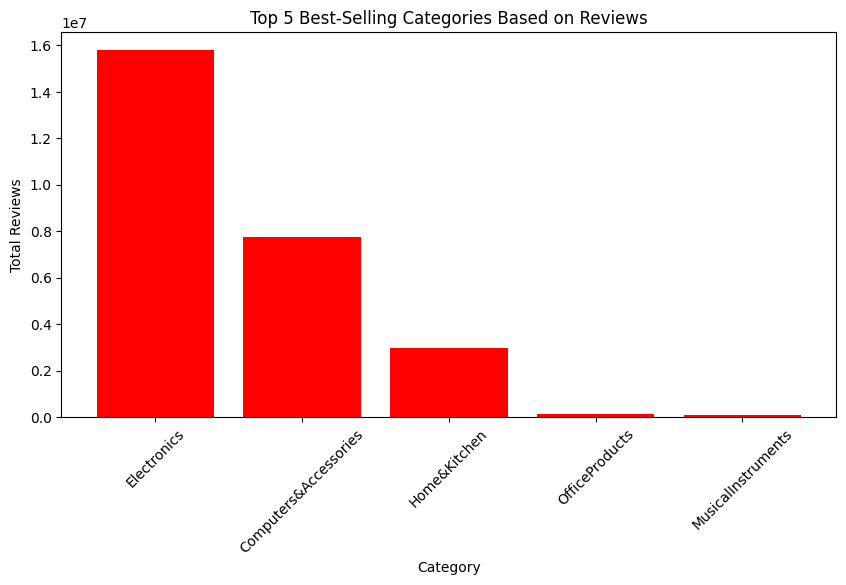

In [31]:
# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_categories['main_category'], top_categories['total_reviews'], color='red')

# Labels and title
plt.xlabel('Category')
plt.ylabel('Total Reviews')
plt.title('Top 5 Best-Selling Categories Based on Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig("top_categories_reviews.png", dpi=500, bbox_inches='tight') 

# Displaying the plot
plt.show()


In [ ]:
# 2️⃣ Top 10 Most Expensive Products 💰

In [33]:
query = """
SELECT product_name, actual_price 
FROM amazon_products
ORDER BY actual_price DESC 
LIMIT 10;
"""
top_expensive_products = pd.read_sql_query(query, conn)

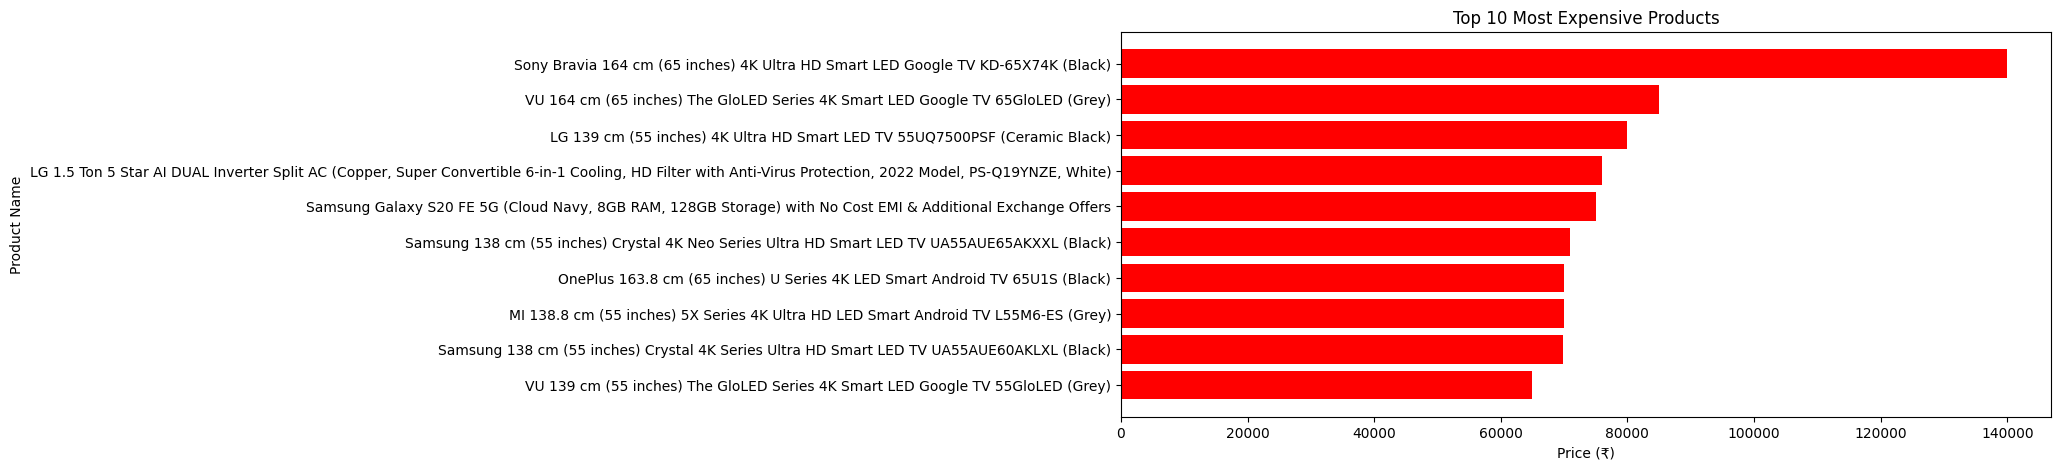

In [36]:
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Try 'Nirmala UI' if available

plt.figure(figsize=(12,5))
plt.barh(top_expensive_products['product_name'], top_expensive_products['actual_price'], color='red')
plt.xlabel('Price (₹)')
plt.ylabel('Product Name')
plt.title('Top 10 Most Expensive Products')
plt.gca().invert_yaxis()

plt.savefig("top_10_most_expensive_products.png", dpi=500, bbox_inches='tight')
plt.show()


In [ ]:
# 3 Top 10 Most Expensive Products 💰

In [37]:
query_cheapest = """
SELECT product_name, main_category, actual_price, discounted_price 
FROM amazon_products
ORDER BY actual_price ASC 
LIMIT 10;
"""
top_cheapest = pd.read_sql_query(query_cheapest, conn)

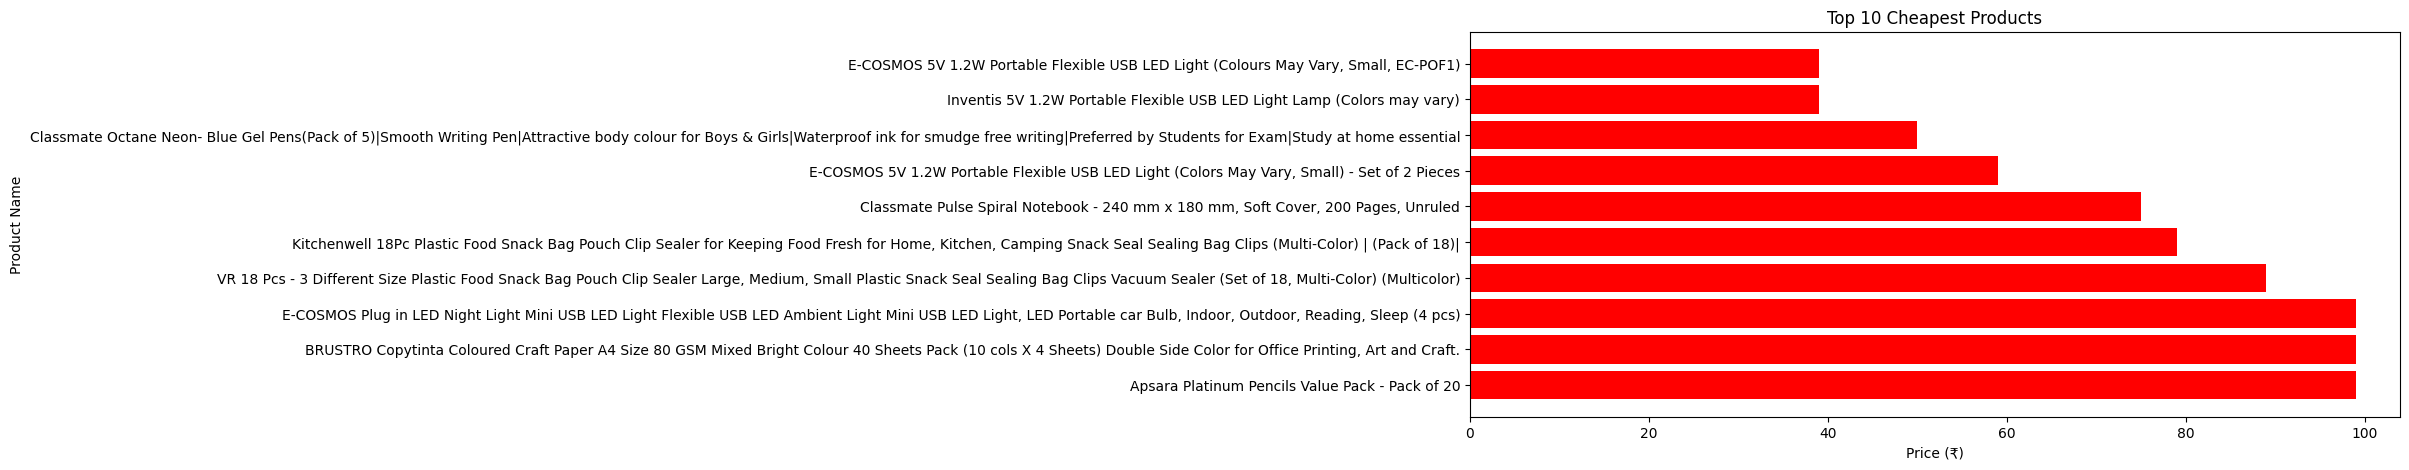

In [38]:
plt.figure(figsize=(12, 5))
plt.barh(top_cheapest['product_name'], top_cheapest['actual_price'], color='red')
plt.xlabel('Price (₹)')
plt.ylabel('Product Name')
plt.title('Top 10 Cheapest Products')
plt.gca().invert_yaxis()  # Invert for better readability

# Save the plot
plt.savefig("top_10_cheapest_products.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# 4 Top 10 Products with Highest Discounts 

In [39]:
query = """
SELECT product_name, discount_percentage 
FROM amazon_products
ORDER BY discount_percentage DESC 
LIMIT 10;
"""
top_discounted = pd.read_sql_query(query, conn)

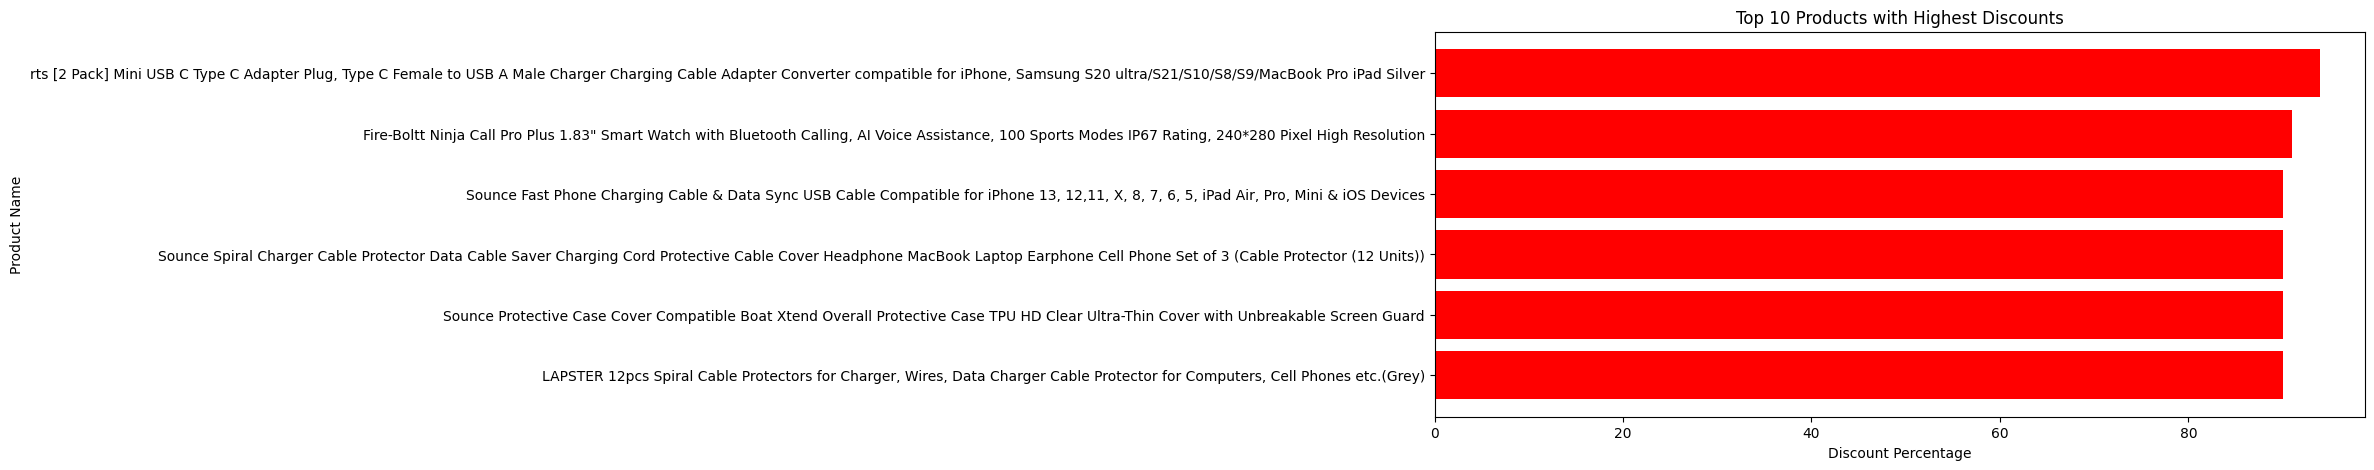

In [40]:
plt.figure(figsize=(12, 5))
plt.barh(top_discounted['product_name'], top_discounted['discount_percentage'], color='red')

# Labels and Title
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Highest Discounts')

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Save the figure
plt.savefig("top_10_highest_discounted_products.png", dpi=500, bbox_inches='tight')

# Show the plot
plt.show()


In [41]:
amazon.to_excel("cleaned_amazon_data.xlsx", index=False)